# Roadmap

In [ ]:
# First I will use sales-only data to forecast demand. I will train with the training set,
# then predict and score using the test set.
# Then I will add in promotional info and do regression with ARIMA and neural networks

1. Get data
2. Create train-test split
3. Clean training set (write functions): missing values, text, categorical attributes, scaling
4. Select models and scoring metrics, then train
5. Compare them: clean test set, make predictions, score
6. Fine-tune models

## 1. Load data

In [1]:
# imports
import pandas as pd

In [2]:
sales = pd.read_excel('wusthof_time_series.xlsx', index_col='EntDate')
sales.head(20)

,012,017,03008944ST-1,03008944ST-3,0300ST1550-1,0300ST15X9-1,0300ST15X9-2,0300ST15X9-3,0300ST1605-1,0300ST1605-2,...,9920-2,9920-3,9920-4,9920-5,9920-6,9920-7,9997-25,HW220D15,HW240DIA,TRUHONE
EntDate,,,,,,,,,,,,,,,,,,,,,
2012-04-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-04-15,0,0,0,0,0,0,0,0,0,0,...,20,19,7,166,98,0,0,0,0,0
2012-04-22,0,0,0,0,0,0,0,0,0,0,...,41,15,10,207,87,0,0,0,0,0
2012-04-29,0,0,0,0,0,0,0,0,0,0,...,38,44,13,101,21,10,0,0,0,0
2012-05-06,0,0,0,0,0,0,0,0,0,0,...,29,47,21,75,43,0,0,0,0,0
2012-05-13,0,0,0,0,0,0,0,0,0,0,...,18,35,0,133,34,0,0,0,0,0
2012-05-20,0,0,0,0,0,0,0,0,0,0,...,42,24,0,90,28,0,0,0,0,0
2012-05-27,0,0,0,0,0,0,0,0,0,0,...,6,20,6,124,73,0,0,0,0,1
2012-06-03,0,0,0,0,0,0,0,0,0,0,...,52,36,13,177,26,0,0,0,0,0


In [ ]:
sales.iloc[:,1]

## 2. Train-Test Split

In [4]:
import matplotlib.pyplot as plt
# splitting into training and testing sets using 66-34
X = sales.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 292
Training Observations: 192
Testing Observations: 100


In [8]:
# made train_df and test_df (the latter to be used later)
train_df = sales[0:192]
test_df = sales[193:292]
train_df.head()

,012,017,03008944ST-1,03008944ST-3,0300ST1550-1,0300ST15X9-1,0300ST15X9-2,0300ST15X9-3,0300ST1605-1,0300ST1605-2,...,9920-2,9920-3,9920-4,9920-5,9920-6,9920-7,9997-25,HW220D15,HW240DIA,TRUHONE
EntDate,,,,,,,,,,,,,,,,,,,,,
2012-04-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-04-15,0,0,0,0,0,0,0,0,0,0,...,20,19,7,166,98,0,0,0,0,0
2012-04-22,0,0,0,0,0,0,0,0,0,0,...,41,15,10,207,87,0,0,0,0,0
2012-04-29,0,0,0,0,0,0,0,0,0,0,...,38,44,13,101,21,10,0,0,0,0
2012-05-06,0,0,0,0,0,0,0,0,0,0,...,29,47,21,75,43,0,0,0,0,0


## Select single item for forecasting

In [19]:
test = train_df['9920-2']
test.head()

EntDate
2012-04-08     0
2012-04-15    20
2012-04-22    41
2012-04-29    38
2012-05-06    29
Name: 9920-2, dtype: int64

In [22]:
train_item = train_df['9920-2']
test_item = test_df['9920-2']
train_item.head()

EntDate
2012-04-08     0
2012-04-15    20
2012-04-22    41
2012-04-29    38
2012-05-06    29
Name: 9920-2, dtype: int64

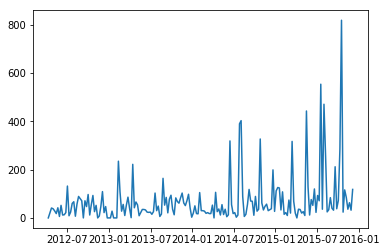

In [24]:
# CAN'T GET TWO-COLORED PRETTY CHART GOING
# then plotting it using different colors
plt.plot(train_item)
#plt.plot([None for i in train_item] + [x for x in test_item])
plt.show()

## 3. Clean Training Set

In [ ]:
# make a copy first

In [ ]:
# make transformations pipeline (first applied to train, then apply to test)
# luckily, our data has no null values, no categorical/text values
# however, to get the initial messy excel sheet into timeseries format was not easy
# describe

## 4. Select Models and Scoring Metrics

We are comparing different forecasting models on the same data, so we can use scale-dependent errors because our single dataset only has one scale. We will use two metrics: <br>
* MAD (also called MAE): $\frac{|A_t-F_t|}{n}$ <br>
* RMSE (root mean squared error): $\sqrt{\frac{(A_t-F_t)^2}{n}}$ <br>

For baseline, we will use:
* naive forecast ("only yesterday matters")

Then we will try two simple forecasts:
* cumulative ("history matters")
* moving average ("I select how much matters")

We will also try:
* ARIMA
* exponential smoothing

In [ ]:
# to select proper exponential smoothing method, we must decompose the time series first

### Naive Forecast (Baseline)

### Cumulative

### Moving Average

### ARIMA